In [1]:
"""### Importacao de bibliotecas"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Passo 1. Carregar base de dados

In [2]:
#Carregar a base e visualizar primeiras linhas
data = pd.read_csv('BreastCancer.csv')
#Visualize a base pelo Explorador de Variáveis

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# colocar id como nome de linha
data = data.set_index('id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#dimnesões da base
data.shape

(569, 31)

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#classes
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#Passo 2. Separar base em treino e teste

In [7]:
np.random.seed(0) #semente inicial
nlinhas = data.shape[0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'diagnosis'], data['diagnosis'], test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


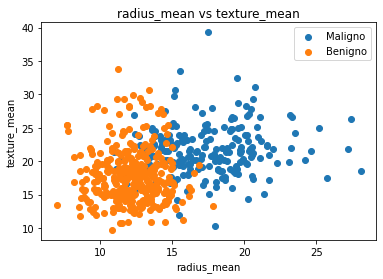

In [8]:
"""## Análise exploratória"""

#### Visualização Raio x Textura  e cores comos as classes de saída (Diagnóstico)

M = data[data.diagnosis == 'M'] #maligno
B = data[data.diagnosis == 'B'] #benigno
plt.scatter(M.radius_mean, M.texture_mean);
plt.scatter(B.radius_mean, B.texture_mean);
plt.legend(['Maligno', 'Benigno'])
plt.xlabel('radius_mean');
plt.ylabel('texture_mean');
plt.title('radius_mean vs texture_mean');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


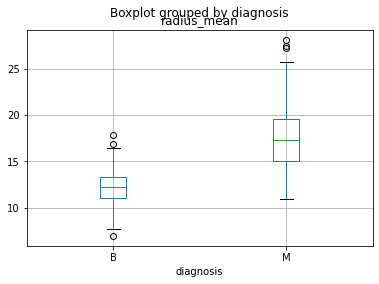

In [9]:
"""#### Visualização Raio x Diagnóstico"""
data.boxplot(column = 'radius_mean', by= 'diagnosis');

# Passo 3. Normalizar Dados

In [10]:
"""## **Normalizando os Dados**"""
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.74998027, -1.09978744, -0.74158608, -0.70188697,  0.58459276,
        -0.42772603, -0.45754987, -0.7605498 , -0.09986038,  0.45144364,
        -0.70061171, -0.06976187, -0.6167312 , -0.54340833, -0.70915256,
        -0.23548916,  0.36208998, -0.62177677, -0.24139043, -0.04596325,
        -0.7984831 , -0.591967  , -0.74660155, -0.71452908,  0.11632807,
        -0.34125524, -0.04627198, -0.6235968 ,  0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, -0.89473179,  0.74288151,
        -0.73184316, -0.84330079, -0.80880455, -1.15975947,  0.48938568,
        -0.88760388,  0.65038093, -0.86919066, -0.62900544,  0.66188352,
        -0.93600214, -0.46060034, -0.42348318, -0.30503075, -0.15870653,
        -1.06870276, -0.16198127, -1.07434344, -0.86894147,  0.38200132,
        -0.97073687, -0.95489389, -0.7612376 , -1.07145262, -0.29541379]])

# Passo 4. Treinar Rede Neural

In [11]:
NumberOfClasses = len(y_train.unique())
NumberOfClasses

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
print(y_train)

[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


In [12]:
"""# Rede Neural"""
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(10,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(NumberOfClasses,activation = 'sigmoid'))
RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________


In [13]:
# treinamento
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6652 - accuracy: 0.6256
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6256
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6256
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6256
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6256
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6256
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.6256
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6256
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.6256
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.6256
Epoch 11/

# Passo 5. Avaliação da Rede Neural

In [23]:
# avaliação
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.27622318267822266
Test accuracy: 0.9356725215911865


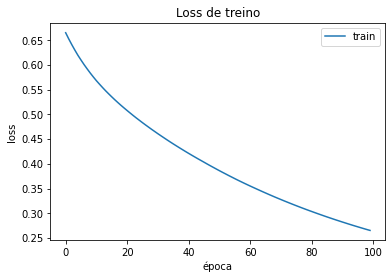

In [15]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.title('Loss de treino')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

# Passo 6. Fazer novas previsões

In [16]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted

array([[0.30283546, 0.69686276],
       [0.86356485, 0.13716236],
       [0.9010458 , 0.08904102],
       [0.86161566, 0.11328954],
       [0.9165901 , 0.09225762],
       [0.8780221 , 0.12806809],
       [0.8211639 , 0.1351564 ],
       [0.8987961 , 0.10197708],
       [0.91663504, 0.07421979],
       [0.9185147 , 0.09194386],
       [0.5559245 , 0.46314436],
       [0.81109345, 0.15894097],
       [0.9032353 , 0.08016819],
       [0.75993633, 0.27331305],
       [0.6059147 , 0.3451839 ],
       [0.2855162 , 0.71898997],
       [0.6843454 , 0.34016496],
       [0.22968572, 0.77411854],
       [0.29374236, 0.76367587],
       [0.20752129, 0.81321764],
       [0.2811805 , 0.71896   ],
       [0.27756703, 0.6794827 ],
       [0.7721552 , 0.20246497],
       [0.8915622 , 0.10016039],
       [0.23208219, 0.7529558 ],
       [0.9135205 , 0.10359749],
       [0.9223207 , 0.07781988],
       [0.22630802, 0.7020078 ],
       [0.88799804, 0.09930241],
       [0.22124615, 0.78940284],
       [0.

In [17]:
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_predicted_indexes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [18]:
encoder.transform(['M', 'B'])

array([1, 0])

In [19]:
pd.DataFrame(y_test).value_counts()

0    108
1     63
dtype: int64

In [20]:
# Matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test)
pd.DataFrame(confMatrix, index=['Pred Benigno', 'Pred Maligno'], columns=['Real Benigno', 'Real Maligno'],) #matriz de confusão

,Real Benigno,Real Maligno
Pred Benigno,106,9
Pred Maligno,2,54


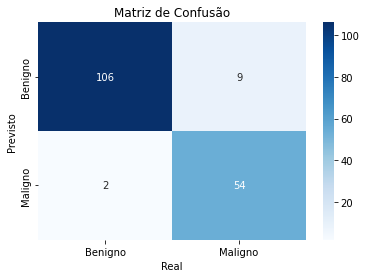

In [21]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.Blues)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Benigno', 'Maligno']) 
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])
plt.show()